# Performance of ML models

This section aims to determine the existence of statistical differences in the performance of the selected models, i.e., MLP, CNN, LSTM and CNN-LSTM, with each dataset.

The results of this notebook are summarized in the Section IV-C of the paper.

In [1]:
import os

from itables import show
from lib.analysis.data_loading import load_reports, load_best_significant
from lib.analysis.model import Model, Source, ActivityMetric, ModelMetric, TargetFilter, obtain_best_items
from lib.analysis.statistical_tests import statistical_comparison
from lib.analysis.visualization import plot_visual_comparison

MODELS = [Model.MLP, Model.CNN, Model.LSTM, Model.CNN_LSTM]
SOURCES = [Source.SP, Source.SW, Source.FUSED]
SIGNIFICANCE_FILE = os.path.join('01_DATA', '04_SIGNIFICANCE', 'best_models.csv')
RESULTS_DIR = os.path.join('02_RESULTS', '03_MODELS', '{0}')

reports = load_reports()

## Overall performance

The tables below show that the CNN is the best-performant model in any dataset and any amount of data.

In the **smartphone** dataset, the CNN-LSTM also performs well for low amounts of data, while with higher quantities of data, there are no statistical differences among the MLP, LSTM and CNN-LSTM. Regarding the **smartwatch** dataset, the LSTM and CNN-LSTM perform best with medium and higher amounts of data, along with the CNN model.

For the **fused** dataset, the CNN and the CNN-LSTM show the best accuracies with any amount of data, while the MLP model significantly shows the worst results.

In [2]:
models_overlall_tests, models_overall_posthoc = statistical_comparison(
    reports,
    (TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES, 
    MODELS
)
models_overlall_tests

sp                                            sw                \
      mlp    cnn   lstm cnn-lstm    H(3) p-value    mlp    cnn   lstm   
n                                                                       
1   0.202  0.390  0.283    0.426  63.138     0.0  0.528  0.678  0.650   
2   0.491  0.659  0.583    0.682  49.458     0.0  0.679  0.755  0.728   
3   0.609  0.719  0.665    0.710  54.824     0.0  0.710  0.788  0.776   
4   0.700  0.776  0.694    0.759  44.015     0.0  0.736  0.807  0.791   
5   0.743  0.811  0.753    0.800  45.246     0.0  0.766  0.829  0.812   
6   0.739  0.798  0.758    0.793  30.480     0.0  0.777  0.834  0.829   
7   0.782  0.837  0.771    0.819  44.531     0.0  0.778  0.838  0.831   
8   0.789  0.836  0.786    0.821  38.073     0.0  0.795  0.840  0.842   
9   0.813  0.843  0.813    0.823  24.215     0.0  0.803  0.857  0.846   
10  0.819  0.854  0.826    0.838  30.906     0.0  0.807  0.858  0.851   
11  0.825  0.856  0.826    0.838  22.820     0.0  0.803  0.854  0.850   
12  0.831  0.855  0.830    0.835  17.955     0.0  0.803  0.858  0.852   
13  0.837  0.861  0.846    0.851  18.860     0.0  0.810  0.859  0.856   
14  0.841  0.869  0.848    0.854  19.856     0.0  0.815  0.863  0.861   
15  0.842  0.869  0.850    0.852  24.013     0.0  0.815  0.864  0.863   
16  0.841  0.870  0.850    0.853  31.019     0.0  0.814  0.868  0.866   
17  0.851  0.877  0.855    0.856  24.430     0.0  0.816  0.867  0.867   
18  0.846  0.877  0.854    0.858  27.748     0.0  0.815  0.867  0.869   
19  0.856  0.873  0.855    0.859  23.246     0.0  0.821  0.869  0.870   
20  0.852  0.880  0.864    0.859  27.445     0.0  0.817  0.872  0.872   
21  0.854  0.884  0.864    0.863  38.568     0.0  0.824  0.871  0.871   
22  0.861  0.886  0.865    0.868  34.760     0.0  0.822  0.874  0.875   

                              fused                                          
   cnn-lstm     H(3) p-value    mlp    cnn   lstm cnn-lstm     H(3) p-value  
n                                                                            
1     0.624  132.544     0.0  0.242  0.511  0.437    0.475   66.589     0.0  
2     0.739   71.994     0.0  0.491  0.716  0.661    0.654   69.982     0.0  
3     0.774   89.297     0.0  0.624  0.787  0.739    0.767  108.814     0.0  
4     0.801  108.119     0.0  0.729  0.821  0.792    0.799   65.616     0.0  
5     0.816   90.656     0.0  0.759  0.838  0.796    0.830   81.758     0.0  
6     0.823   94.456     0.0  0.788  0.849  0.812    0.839   70.833     0.0  
7     0.823  113.771     0.0  0.795  0.852  0.821    0.847   75.129     0.0  
8     0.833  107.121     0.0  0.802  0.858  0.832    0.852   70.929     0.0  
9     0.852  128.881     0.0  0.819  0.872  0.849    0.869   78.168     0.0  
10    0.849  122.873     0.0  0.840  0.875  0.860    0.874   60.891     0.0  
11    0.849  123.208     0.0  0.840  0.874  0.861    0.870   49.824     0.0  
12    0.854  142.441     0.0  0.847  0.877  0.866    0.883   61.943     0.0  
13    0.856  149.958     0.0  0.849  0.887  0.867    0.888   87.474     0.0  
14    0.856  159.488     0.0  0.855  0.889  0.875    0.886   64.162     0.0  
15    0.858  158.026     0.0  0.861  0.889  0.875    0.890   59.296     0.0  
16    0.860  168.872     0.0  0.864  0.890  0.882    0.894   75.081     0.0  
17    0.861  170.798     0.0  0.867  0.895  0.878    0.894   72.092     0.0  
18    0.864  170.957     0.0  0.867  0.896  0.879    0.894   72.640     0.0  
19    0.868  175.237     0.0  0.872  0.896  0.884    0.896   69.911     0.0  
20    0.866  178.248     0.0  0.876  0.898  0.886    0.897   66.134     0.0  
21    0.867  170.556     0.0  0.873  0.897  0.885    0.900   58.449     0.0  
22    0.869  198.656     0.0  0.879  0.902  0.889    0.901   65.920     0.0

In [3]:
show(models_overall_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


## Activity-wise performance

The following sections address the performance of the selected models in each activity and data source. 

### `SEATED`

Tables below show different results regarding the data source.

Using the **smartphone** dataset, the CNN-LSTM seems to perform well with low and high quantities of data, while the CNN and LSTM are also the best with high amounts of data. With the **smartwatch** dataset, the best results are obtained by the CNN, LSTM and CNN-LSTM with low amounts of data, while with higher amounts no significant differences are observed among models. Regarding the **fused** dataset, the CNN and the CNN-LSTM are the best-performing models, followed by the LSTM. The MLP provides the worst results.

In [4]:
models_seated_tests, models_seated_posthoc = statistical_comparison(
    reports,
    (TargetFilter.SEATED, ActivityMetric.F1), 
    SOURCES, 
    MODELS
)
models_seated_tests

sp                                             sw                \
      mlp    cnn   lstm cnn-lstm     H(3) p-value    mlp    cnn   lstm   
n                                                                        
1   0.065  0.000  0.083    0.084   11.680   0.009  0.397  0.772  0.749   
2   0.210  0.273  0.176    0.737   65.804   0.000  0.706  0.830  0.823   
3   0.245  0.593  0.431    0.788  160.718   0.000  0.805  0.849  0.844   
4   0.498  0.733  0.587    0.800   79.843   0.000  0.840  0.864  0.851   
5   0.660  0.783  0.653    0.812   82.175   0.000  0.841  0.868  0.856   
6   0.645  0.774  0.669    0.797   63.842   0.000  0.850  0.869  0.857   
7   0.727  0.794  0.735    0.821   70.529   0.000  0.849  0.866  0.862   
8   0.738  0.810  0.758    0.811   57.865   0.000  0.868  0.873  0.867   
9   0.778  0.833  0.797    0.836   38.683   0.000  0.871  0.880  0.870   
10  0.767  0.830  0.794    0.833   47.298   0.000  0.872  0.877  0.871   
11  0.780  0.827  0.799    0.830   38.571   0.000  0.870  0.878  0.866   
12  0.787  0.833  0.811    0.833   28.954   0.000  0.876  0.880  0.876   
13  0.807  0.831  0.806    0.831   16.346   0.001  0.877  0.884  0.877   
14  0.802  0.842  0.828    0.828   18.119   0.000  0.877  0.885  0.872   
15  0.801  0.837  0.830    0.833   18.467   0.000  0.873  0.882  0.876   
16  0.809  0.847  0.823    0.843   27.844   0.000  0.875  0.885  0.887   
17  0.807  0.848  0.830    0.836   15.002   0.002  0.881  0.880  0.876   
18  0.807  0.842  0.837    0.843   16.857   0.001  0.882  0.885  0.886   
19  0.812  0.842  0.829    0.837   11.724   0.008  0.880  0.889  0.878   
20  0.813  0.851  0.830    0.844   20.166   0.000  0.885  0.884  0.883   
21  0.814  0.854  0.842    0.837   17.413   0.001  0.875  0.881  0.886   
22  0.826  0.850  0.851    0.842   13.438   0.004  0.879  0.887  0.887   

                              fused                                          
   cnn-lstm     H(3) p-value    mlp    cnn   lstm cnn-lstm     H(3) p-value  
n                                                                            
1     0.644  149.050   0.000  0.116  0.388  0.316    0.136   15.160   0.002  
2     0.826   85.527   0.000  0.456  0.716  0.650    0.705   31.707   0.000  
3     0.850   44.039   0.000  0.543  0.800  0.741    0.816  117.621   0.000  
4     0.858   19.856   0.000  0.673  0.823  0.800    0.827   79.399   0.000  
5     0.858   17.609   0.001  0.685  0.839  0.800    0.853   97.686   0.000  
6     0.875   24.199   0.000  0.720  0.839  0.800    0.849   75.313   0.000  
7     0.872   12.677   0.005  0.702  0.854  0.828    0.868  110.599   0.000  
8     0.877    7.535   0.057  0.717  0.861  0.833    0.870  126.446   0.000  
9     0.879    8.419   0.038  0.793  0.861  0.845    0.870   69.917   0.000  
10    0.881    9.849   0.020  0.787  0.872  0.844    0.875   89.605   0.000  
11    0.878    4.333   0.228  0.798  0.867  0.844    0.865   68.845   0.000  
12    0.882    4.283   0.232  0.808  0.876  0.862    0.875   71.107   0.000  
13    0.878    5.176   0.159  0.816  0.871  0.847    0.874   69.197   0.000  
14    0.879    3.501   0.321  0.813  0.877  0.863    0.874   63.730   0.000  
15    0.882    3.256   0.354  0.835  0.872  0.858    0.880   54.007   0.000  
16    0.886    6.688   0.083  0.841  0.876  0.857    0.880   52.211   0.000  
17    0.881    1.035   0.793  0.833  0.877  0.865    0.880   55.932   0.000  
18    0.882    2.252   0.522  0.838  0.875  0.861    0.880   50.721   0.000  
19    0.881    3.603   0.308  0.846  0.875  0.865    0.885   53.275   0.000  
20    0.884    1.086   0.780  0.842  0.877  0.868    0.883   51.086   0.000  
21    0.883    4.813   0.186  0.844  0.875  0.867    0.885   56.551   0.000  
22    0.883    5.229   0.156  0.845  0.875  0.867    0.885   48.592   0.000

In [5]:
show(models_seated_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `STANDING_UP`

The results in tables below show that the CNN models are the best-performing with any amount of data and data source. The CNN-LSTM are also the best-performing with the **smartphone** and **fused** datasets with any quantity of data, while with the **smartwatch** dataset it struggles with low quantities of data. The LSTM also performs well with high amounts of data using the **smartphone** and **smartwatch** datasets. It also provides better results than the MLP with the **fused** dataset.

In [6]:
models_standing_tests, models_standing_posthoc = statistical_comparison(
    reports,
    (TargetFilter.STANDING_UP, ActivityMetric.F1), 
    SOURCES, 
    MODELS
)
models_standing_tests

sp                                            sw                \
      mlp    cnn   lstm cnn-lstm    H(3) p-value    mlp    cnn   lstm   
n                                                                       
1   0.060  0.130  0.093    0.139   7.222   0.065  0.434  0.583  0.546   
2   0.209  0.362  0.272    0.318   8.956   0.030  0.555  0.675  0.632   
3   0.324  0.482  0.369    0.494  23.561   0.000  0.563  0.716  0.667   
4   0.485  0.609  0.470    0.600  20.113   0.000  0.613  0.767  0.717   
5   0.496  0.657  0.541    0.638  29.682   0.000  0.634  0.781  0.753   
6   0.514  0.643  0.528    0.626  13.981   0.003  0.637  0.800  0.771   
7   0.590  0.693  0.564    0.699  28.916   0.000  0.658  0.809  0.768   
8   0.607  0.713  0.642    0.699  21.332   0.000  0.674  0.804  0.796   
9   0.651  0.745  0.704    0.726  18.538   0.000  0.694  0.823  0.811   
10  0.643  0.769  0.707    0.743  30.327   0.000  0.698  0.830  0.824   
11  0.681  0.775  0.724    0.771  22.470   0.000  0.696  0.823  0.814   
12  0.675  0.748  0.721    0.756  14.996   0.002  0.688  0.830  0.825   
13  0.696  0.775  0.762    0.771  18.254   0.000  0.693  0.833  0.832   
14  0.712  0.788  0.765    0.777  19.215   0.000  0.697  0.832  0.835   
15  0.721  0.792  0.765    0.769  21.447   0.000  0.703  0.845  0.842   
16  0.726  0.800  0.765    0.791  22.335   0.000  0.715  0.843  0.841   
17  0.738  0.791  0.780    0.783  12.886   0.005  0.712  0.842  0.843   
18  0.724  0.805  0.779    0.786  20.594   0.000  0.716  0.843  0.854   
19  0.753  0.809  0.788    0.798  17.009   0.001  0.712  0.847  0.846   
20  0.749  0.805  0.789    0.800  18.931   0.000  0.714  0.850  0.852   
21  0.753  0.809  0.800    0.802  21.894   0.000  0.717  0.847  0.846   
22  0.745  0.821  0.792    0.807  26.722   0.000  0.714  0.857  0.851   

                              fused                                         
   cnn-lstm     H(3) p-value    mlp    cnn   lstm cnn-lstm    H(3) p-value  
n                                                                           
1     0.517   75.799     0.0  0.141  0.320  0.290    0.275  42.826     0.0  
2     0.656   62.556     0.0  0.320  0.563  0.481    0.487  37.790     0.0  
3     0.681  118.717     0.0  0.469  0.667  0.550    0.646  56.076     0.0  
4     0.730  128.312     0.0  0.594  0.738  0.670    0.722  43.020     0.0  
5     0.760  145.508     0.0  0.614  0.749  0.699    0.742  54.173     0.0  
6     0.772  164.682     0.0  0.626  0.766  0.701    0.760  44.998     0.0  
7     0.786  169.250     0.0  0.667  0.777  0.713    0.777  65.890     0.0  
8     0.788  158.415     0.0  0.678  0.793  0.732    0.793  56.438     0.0  
9     0.805  198.948     0.0  0.731  0.813  0.777    0.809  51.521     0.0  
10    0.818  182.902     0.0  0.732  0.818  0.789    0.822  49.148     0.0  
11    0.814  185.085     0.0  0.735  0.827  0.791    0.824  51.660     0.0  
12    0.827  208.469     0.0  0.740  0.825  0.786    0.840  50.615     0.0  
13    0.819  202.887     0.0  0.766  0.841  0.800    0.847  63.189     0.0  
14    0.826  189.750     0.0  0.755  0.838  0.813    0.839  50.068     0.0  
15    0.839  220.215     0.0  0.769  0.848  0.821    0.851  53.440     0.0  
16    0.836  203.906     0.0  0.779  0.857  0.830    0.861  68.146     0.0  
17    0.832  222.401     0.0  0.778  0.857  0.825    0.857  60.781     0.0  
18    0.833  198.738     0.0  0.789  0.859  0.825    0.860  53.781     0.0  
19    0.831  199.322     0.0  0.794  0.860  0.844    0.870  61.465     0.0  
20    0.838  211.687     0.0  0.798  0.869  0.845    0.862  48.278     0.0  
21    0.837  206.533     0.0  0.800  0.871  0.847    0.865  44.830     0.0  
22    0.844  220.480     0.0  0.800  0.871  0.859    0.872  51.819     0.0

In [7]:
show(models_standing_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `WALKING`

The results shown below indicate that the CNN models provide the best results with any amount of data across the three data sources. The CNN-LSTM obtains good results with low amounts of data with the **smartphone** dataset, while it also produces the best results with medium and high quantities of data with the **fused** dataset. The LSTM performs well using the **smartwatch** dataset, similar to the CNN. The MLP provides the worst results with the **smartwatch** dataset, although its results are not different from the LSTM using the **smartphone** and **fused** datasets.

In [8]:
models_walking_tests, models_walking_posthoc = statistical_comparison(
    reports,
    (TargetFilter.WALKING, ActivityMetric.F1), 
    SOURCES, 
    MODELS
)
models_walking_tests

sp                                            sw                \
      mlp    cnn   lstm cnn-lstm    H(3) p-value    mlp    cnn   lstm   
n                                                                       
1   0.027  0.471  0.347    0.509  32.545   0.000  0.679  0.765  0.734   
2   0.599  0.775  0.728    0.794  36.256   0.000  0.778  0.833  0.801   
3   0.764  0.826  0.784    0.820  37.277   0.000  0.795  0.852  0.841   
4   0.817  0.859  0.799    0.847  31.366   0.000  0.815  0.865  0.860   
5   0.856  0.889  0.838    0.874  39.282   0.000  0.835  0.883  0.870   
6   0.845  0.874  0.833    0.874  25.530   0.000  0.848  0.886  0.877   
7   0.874  0.899  0.842    0.898  47.897   0.000  0.849  0.887  0.883   
8   0.870  0.895  0.848    0.884  35.927   0.000  0.855  0.886  0.889   
9   0.893  0.905  0.882    0.887  21.562   0.000  0.859  0.900  0.893   
10  0.898  0.910  0.884    0.904  23.344   0.000  0.865  0.901  0.894   
11  0.898  0.907  0.879    0.899  15.977   0.001  0.868  0.897  0.894   
12  0.905  0.911  0.887    0.896  18.304   0.000  0.866  0.901  0.899   
13  0.905  0.917  0.900    0.906  17.876   0.000  0.869  0.901  0.898   
14  0.909  0.916  0.903    0.910  14.686   0.002  0.870  0.907  0.906   
15  0.909  0.922  0.902    0.908  18.750   0.000  0.874  0.908  0.905   
16  0.910  0.925  0.904    0.909  29.269   0.000  0.869  0.909  0.905   
17  0.914  0.925  0.903    0.910  24.184   0.000  0.871  0.908  0.909   
18  0.913  0.928  0.909    0.914  23.263   0.000  0.873  0.908  0.906   
19  0.916  0.927  0.905    0.918  31.125   0.000  0.875  0.908  0.906   
20  0.916  0.928  0.912    0.917  24.246   0.000  0.874  0.912  0.910   
21  0.917  0.931  0.915    0.918  35.637   0.000  0.880  0.913  0.913   
22  0.918  0.932  0.912    0.921  32.243   0.000  0.877  0.913  0.911   

                              fused                                         
   cnn-lstm     H(3) p-value    mlp    cnn   lstm cnn-lstm    H(3) p-value  
n                                                                           
1     0.736   41.215     0.0  0.071  0.620  0.576    0.603  74.004   0.000  
2     0.810   22.720     0.0  0.667  0.811  0.759    0.768  43.791   0.000  
3     0.843   28.667     0.0  0.780  0.861  0.803    0.836  60.772   0.000  
4     0.861   53.271     0.0  0.813  0.875  0.847    0.853  44.495   0.000  
5     0.867   46.765     0.0  0.847  0.888  0.853    0.883  49.080   0.000  
6     0.870   39.992     0.0  0.856  0.893  0.860    0.885  40.431   0.000  
7     0.871   54.890     0.0  0.876  0.901  0.880    0.894  29.142   0.000  
8     0.879   47.876     0.0  0.882  0.904  0.877    0.898  30.463   0.000  
9     0.893   73.398     0.0  0.887  0.915  0.890    0.914  44.828   0.000  
10    0.892   61.901     0.0  0.899  0.915  0.904    0.913  22.228   0.000  
11    0.892   60.148     0.0  0.899  0.912  0.902    0.912  14.110   0.003  
12    0.893   78.130     0.0  0.904  0.914  0.904    0.919  26.160   0.000  
13    0.896   80.415     0.0  0.908  0.924  0.907    0.925  48.442   0.000  
14    0.898  102.948     0.0  0.908  0.925  0.917    0.925  31.878   0.000  
15    0.900   85.587     0.0  0.915  0.925  0.914    0.927  33.798   0.000  
16    0.899  100.920     0.0  0.914  0.925  0.919    0.930  39.304   0.000  
17    0.902  106.378     0.0  0.918  0.928  0.916    0.928  33.331   0.000  
18    0.902  100.240     0.0  0.916  0.928  0.918    0.933  36.701   0.000  
19    0.904  106.258     0.0  0.918  0.929  0.919    0.932  34.601   0.000  
20    0.906  109.615     0.0  0.922  0.930  0.925    0.932  30.369   0.000  
21    0.905   97.691     0.0  0.923  0.931  0.925    0.933  26.441   0.000  
22    0.907  126.709     0.0  0.923  0.933  0.925    0.935  34.526   0.000

In [9]:
show(models_walking_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `TURNING`

Tables below show that the CNN, LSTM and CNN-LSTM obtain the best results in the **smartwatch** dataset. These three models also perform well with low amounts of data using the **smartphone** and **fused** datasets. However, no significant differences among models are observed after $n \geq 5$ and $n \geq 7$, respectively. In the case of the **smartphone** dataset, significant differences appear after $n \geq 15$, with the MLP and the CNN being the best. With the **fused** dataset, after $n \geq 21$, the LSTM provides the significantly worse results.

In [10]:
models_turning_tests, models_turning_posthoc = statistical_comparison(
    reports,
    (TargetFilter.TURNING, ActivityMetric.F1), 
    SOURCES, 
    MODELS
)
models_turning_tests

sp                                             sw                \
      mlp    cnn   lstm cnn-lstm     H(3) p-value    mlp    cnn   lstm   
n                                                                        
1   0.151  0.589  0.402    0.568  100.751   0.000  0.412  0.648  0.514   
2   0.636  0.779  0.744    0.763   27.331   0.000  0.614  0.692  0.642   
3   0.733  0.796  0.784    0.773   19.168   0.000  0.674  0.728  0.715   
4   0.783  0.820  0.813    0.818   11.748   0.008  0.670  0.742  0.728   
5   0.829  0.826  0.811    0.839    7.205   0.066  0.701  0.753  0.746   
6   0.821  0.827  0.812    0.827    5.653   0.130  0.714  0.766  0.761   
7   0.840  0.842  0.825    0.844    5.340   0.149  0.716  0.773  0.763   
8   0.836  0.849  0.832    0.846    5.351   0.148  0.723  0.772  0.780   
9   0.847  0.843  0.838    0.839    3.940   0.268  0.728  0.786  0.773   
10  0.854  0.854  0.851    0.844    1.941   0.585  0.734  0.793  0.786   
11  0.845  0.852  0.845    0.846    3.307   0.347  0.728  0.784  0.784   
12  0.853  0.859  0.848    0.848    7.396   0.060  0.726  0.794  0.786   
13  0.856  0.864  0.852    0.860    7.294   0.063  0.736  0.799  0.788   
14  0.856  0.860  0.850    0.856    3.968   0.265  0.743  0.797  0.802   
15  0.861  0.867  0.854    0.857   10.448   0.015  0.745  0.802  0.799   
16  0.862  0.867  0.860    0.856    8.346   0.039  0.738  0.802  0.807   
17  0.866  0.871  0.855    0.860   14.598   0.002  0.735  0.801  0.806   
18  0.864  0.866  0.858    0.858    9.824   0.020  0.743  0.802  0.805   
19  0.866  0.869  0.853    0.860   14.999   0.002  0.742  0.807  0.812   
20  0.864  0.870  0.859    0.864   13.366   0.004  0.742  0.812  0.815   
21  0.865  0.874  0.860    0.862   15.351   0.002  0.750  0.819  0.812   
22  0.864  0.870  0.861    0.865    8.253   0.041  0.743  0.812  0.817   

                              fused                                          
   cnn-lstm     H(3) p-value    mlp    cnn   lstm cnn-lstm     H(3) p-value  
n                                                                            
1     0.574  232.008     0.0  0.344  0.534  0.478    0.497   82.072   0.000  
2     0.663   67.321     0.0  0.451  0.761  0.768    0.682  103.413   0.000  
3     0.709   57.915     0.0  0.648  0.796  0.783    0.759   94.346   0.000  
4     0.727   67.707     0.0  0.738  0.810  0.818    0.785   35.390   0.000  
5     0.741   47.987     0.0  0.784  0.827  0.835    0.809   35.670   0.000  
6     0.757   64.089     0.0  0.797  0.823  0.827    0.822   18.993   0.000  
7     0.758   64.602     0.0  0.828  0.837  0.835    0.830    8.279   0.041  
8     0.759   67.717     0.0  0.834  0.839  0.841    0.832    3.417   0.332  
9     0.781   72.782     0.0  0.836  0.849  0.845    0.840    6.762   0.080  
10    0.786   76.116     0.0  0.846  0.849  0.851    0.847    0.834   0.841  
11    0.782   78.787     0.0  0.850  0.849  0.850    0.839    7.096   0.069  
12    0.790   95.204     0.0  0.859  0.849  0.855    0.854    2.081   0.556  
13    0.785   95.504     0.0  0.859  0.860  0.851    0.859    1.590   0.662  
14    0.791   88.731     0.0  0.862  0.862  0.855    0.855    6.602   0.086  
15    0.795   95.701     0.0  0.865  0.860  0.860    0.856    4.725   0.193  
16    0.794  101.760     0.0  0.863  0.862  0.860    0.857    0.397   0.941  
17    0.806  116.932     0.0  0.868  0.862  0.859    0.860    5.646   0.130  
18    0.800  107.298     0.0  0.862  0.867  0.860    0.862    3.121   0.373  
19    0.805  106.796     0.0  0.864  0.869  0.859    0.863    3.746   0.290  
20    0.799  126.077     0.0  0.868  0.868  0.860    0.866    5.491   0.139  
21    0.803  125.665     0.0  0.870  0.869  0.859    0.864   12.210   0.007  
22    0.807  134.359     0.0  0.868  0.870  0.861    0.866   10.585   0.014

In [11]:
show(models_turning_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


### `SITTING_DOWN`

The results from tables below indicate that the CNN is the best-performing model with any quantity of data across data sources. The CNN-LSTM also performs well with any amount of data using the **fused** dataset, while also showing a good performance with low and medium amounts of data using the **smartphone** and **smartwatch** datasets. The LSTM performs well with high amounts of data using the **smartphone** and **smartwatch** datasets, and provides better results than the MLP model using the **fused** dataset. In the case of the MLP, it provides the worst results in any scenario.

In [12]:
models_sitting_tests, models_sitting_posthoc = statistical_comparison(
    reports,
    (TargetFilter.SITTING_DOWN, ActivityMetric.F1), 
    SOURCES, 
    MODELS
)
models_sitting_tests

sp                                            sw                \
      mlp    cnn   lstm cnn-lstm    H(3) p-value    mlp    cnn   lstm   
n                                                                       
1   0.108  0.102  0.094    0.152   3.785   0.286  0.368  0.583  0.499   
2   0.207  0.363  0.305    0.265  11.881   0.008  0.458  0.657  0.649   
3   0.286  0.473  0.406    0.471  35.016   0.000  0.535  0.725  0.691   
4   0.420  0.619  0.502    0.572  35.908   0.000  0.603  0.754  0.718   
5   0.507  0.651  0.547    0.613  32.061   0.000  0.632  0.768  0.750   
6   0.518  0.650  0.617    0.632  27.322   0.000  0.633  0.786  0.766   
7   0.594  0.704  0.597    0.680  38.170   0.000  0.659  0.793  0.778   
8   0.612  0.705  0.634    0.693  33.109   0.000  0.667  0.806  0.794   
9   0.659  0.738  0.689    0.692  30.200   0.000  0.688  0.822  0.808   
10  0.660  0.751  0.736    0.724  35.525   0.000  0.695  0.829  0.815   
11  0.669  0.766  0.739    0.727  29.183   0.000  0.695  0.828  0.809   
12  0.687  0.765  0.743    0.736  22.593   0.000  0.697  0.824  0.818   
13  0.710  0.774  0.753    0.756  19.137   0.000  0.701  0.827  0.817   
14  0.717  0.784  0.765    0.753  21.136   0.000  0.706  0.832  0.823   
15  0.713  0.787  0.778    0.761  26.514   0.000  0.714  0.834  0.828   
16  0.714  0.791  0.783    0.759  37.802   0.000  0.704  0.845  0.831   
17  0.734  0.809  0.796    0.774  28.286   0.000  0.720  0.837  0.833   
18  0.739  0.800  0.795    0.768  30.999   0.000  0.715  0.846  0.833   
19  0.743  0.806  0.786    0.769  27.103   0.000  0.722  0.845  0.844   
20  0.750  0.807  0.796    0.783  32.416   0.000  0.714  0.838  0.833   
21  0.744  0.816  0.806    0.788  37.110   0.000  0.730  0.840  0.841   
22  0.768  0.821  0.800    0.790  29.114   0.000  0.726  0.850  0.842   

                              fused                                          
   cnn-lstm     H(3) p-value    mlp    cnn   lstm cnn-lstm     H(3) p-value  
n                                                                            
1     0.479  139.149     0.0  0.100  0.238  0.252    0.168   39.136     0.0  
2     0.624  190.870     0.0  0.346  0.581  0.511    0.478   33.878     0.0  
3     0.717  170.778     0.0  0.443  0.671  0.610    0.620   54.230     0.0  
4     0.730  147.828     0.0  0.569  0.712  0.680    0.709   46.529     0.0  
5     0.748  140.511     0.0  0.612  0.753  0.654    0.754   91.191     0.0  
6     0.766  176.413     0.0  0.642  0.779  0.711    0.780   79.841     0.0  
7     0.778  166.434     0.0  0.658  0.800  0.738    0.812  109.438     0.0  
8     0.786  168.501     0.0  0.679  0.811  0.754    0.807   94.447     0.0  
9     0.806  175.911     0.0  0.698  0.827  0.785    0.815   92.280     0.0  
10    0.802  169.903     0.0  0.731  0.841  0.792    0.828   88.379     0.0  
11    0.811  178.988     0.0  0.728  0.828  0.786    0.828   95.685     0.0  
12    0.805  179.573     0.0  0.743  0.843  0.814    0.842  101.743     0.0  
13    0.804  185.931     0.0  0.765  0.850  0.809    0.856  105.213     0.0  
14    0.811  202.297     0.0  0.762  0.860  0.831    0.849  106.044     0.0  
15    0.814  186.076     0.0  0.783  0.857  0.824    0.857   75.894     0.0  
16    0.823  218.240     0.0  0.785  0.848  0.838    0.865   95.678     0.0  
17    0.822  182.075     0.0  0.786  0.857  0.832    0.860   86.950     0.0  
18    0.824  191.156     0.0  0.785  0.869  0.837    0.866  120.677     0.0  
19    0.823  204.957     0.0  0.800  0.873  0.839    0.870   86.678     0.0  
20    0.822  201.035     0.0  0.802  0.873  0.850    0.876   92.564     0.0  
21    0.822  180.729     0.0  0.813  0.872  0.840    0.871   91.379     0.0  
22    0.829  211.321     0.0  0.810  0.879  0.846    0.876   94.619     0.0

In [13]:
show(models_sitting_posthoc, classes="display nowrap compact")

Loading ITables v2.4.4 from the internet... (need help?)


In [14]:
models_seated_tests.to_csv(RESULTS_DIR.format('01.1_seated-tests.csv'))
models_standing_tests.to_csv(RESULTS_DIR.format('01.2_standing-tests.csv'))
models_walking_tests.to_csv(RESULTS_DIR.format('01.3_walking-tests.csv'))
models_turning_tests.to_csv(RESULTS_DIR.format('01.4_turning-tests.csv'))
models_sitting_tests.to_csv(RESULTS_DIR.format('01.5_sitting-tests.csv'))

models_seated_posthoc.to_csv(RESULTS_DIR.format('01.1_seated-post.csv'))
models_standing_posthoc.to_csv(RESULTS_DIR.format('01.2_standing-post.csv'))
models_walking_posthoc.to_csv(RESULTS_DIR.format('01.3_walking-post.csv'))
models_turning_posthoc.to_csv(RESULTS_DIR.format('01.4_turning-post.csv'))
models_sitting_posthoc.to_csv(RESULTS_DIR.format('01.5_sitting-post.csv'))

## Visual representation

The following figure summarises the previous tables. Each model is represented by a shape:

- **MLP**: blue **triangle**
- **CNN**: green **square**
- **LSTM**: red **diamond**
- **CNN-LSTM**: purple **circle**

In the figure, there is one or several of these icons for each metric and datasource and training set size (number of subjects). Here are the possible scenarios:

- A single icon: the model represented by the icon obtained the statistically best results.
- _N_ icons: the models represented by the _N_ icons obtained the statistically best results. The _N_ models are ordered by best absolute mean accuracy/F1-score from left to right.
- A cross: no significant differeces were observed among models.

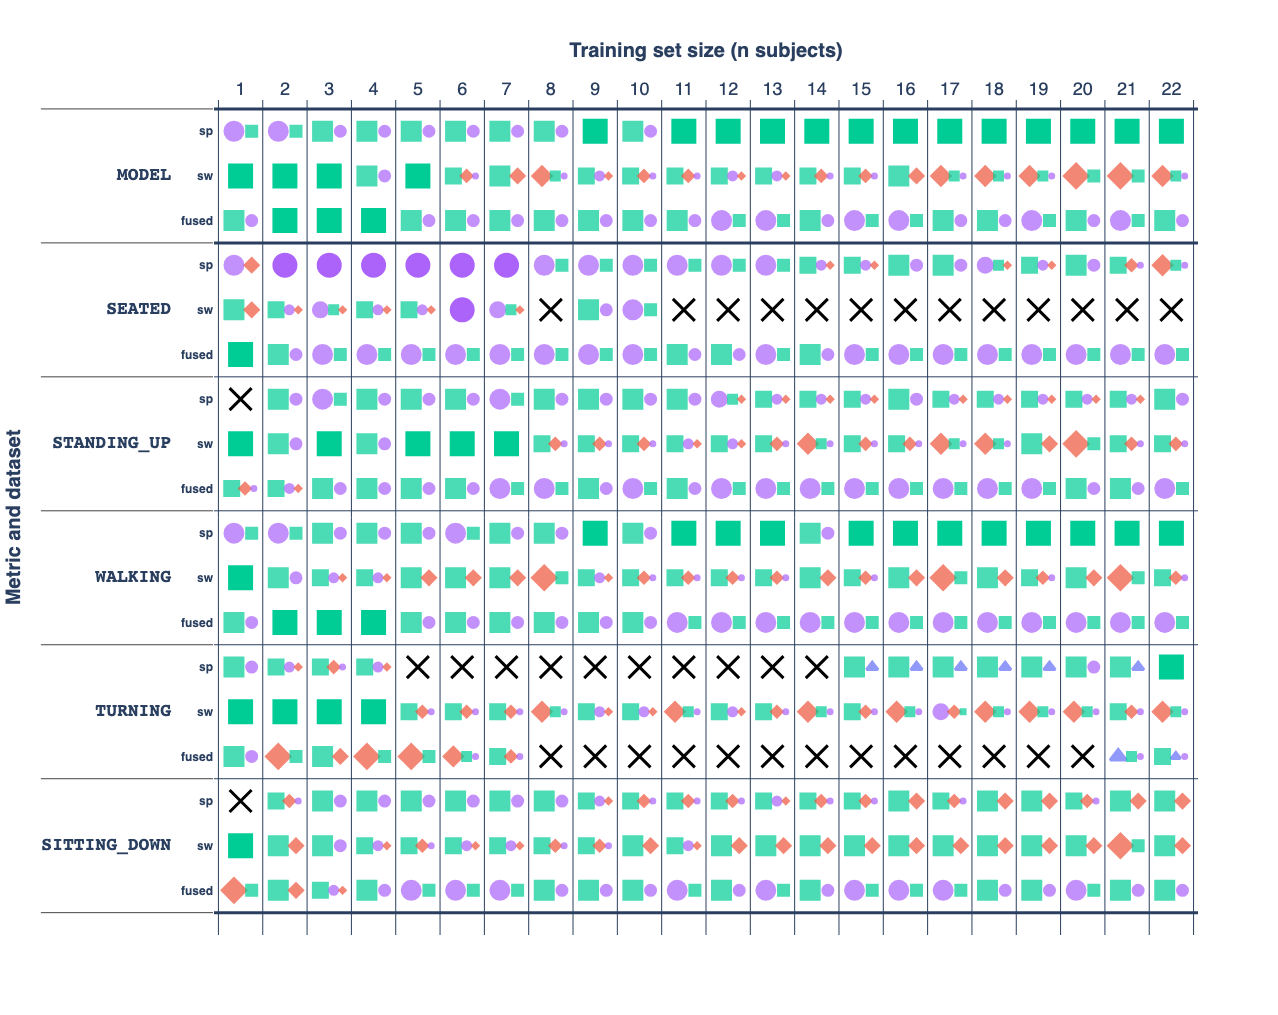

In [14]:
sources_results = {
    TargetFilter.MODEL: models_overlall_tests, 
    TargetFilter.SEATED: models_seated_tests, 
    TargetFilter.STANDING_UP: models_standing_tests, 
    TargetFilter.WALKING: models_walking_tests, 
    TargetFilter.TURNING: models_turning_tests, 
    TargetFilter.SITTING_DOWN: models_sitting_tests
}

best_sources = obtain_best_items(sources_results, MODELS, SOURCES)
significance_sources = load_best_significant(SIGNIFICANCE_FILE)

best_models_fig = plot_visual_comparison(best_sources, significance_sources, MODELS, SOURCES, yaxis_conf={'title': 'dataset', 'range': [18, -0.7]})
best_models_fig

In [15]:
best_models_fig.write_image(RESULTS_DIR.format('02_best-models.pdf'))

## Summary

The results obtained in the executed analyses show that the CNN is always the best-performing model in terms of overall accuracy for all data sources and any amount of data. The LSTM also performs well with the **smartwatch** dataset, and the CNN-LSTM with the **smartwatch** and **fused** datasets. The MLP is the worst performing model across data sources, where the differences between the **smartwatch**- and **fused**-trained models are significant.
 
Regarding activity-wise performance, the CNN model presents the best results in every activity and data source. The LSTM performs similarly to the CNN model using the **smartwatch** dataset in all activities and the **smartphone** dataset in all activities except `TURNING`. The performance of the CNN-LSTM seems to work well in some activities on the **smartphone** and **smartwatch** datasets, although their results are a bit unstable. On the other hand, the CNN-LSTM shines with the **fused** dataset, obtaining similar results as the CNN. The MLP model presents the worst results in every case except the `WALKING` and `TURNING` with the **smartphone** dataset.

The above figure shows a clear dominance by the CNN model, where it still provides the best metrics even when there is no significant difference compared to other models. In addition, when it does not provide the best results, they are still not significantly different from the best models on most occasions. It is noticeable the lack of influence of the model in the `SEATED` activity with **smartwatch** dataset, and in the `TURNING` activity with **smartphone** and **fused** datasets.

In summary, it can be stated that the CNN model is the best of the considered ones since it performs well in every situation. In addition, the LSTM and the CNN-LSTM would also be a feasible option when using **smartwatch** and **fused** data. The usage of the MLP model would be strongly discouraged since here and in related works it obtains the worst results.